In [ ]:
import torch
import torchvision
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

In [ ]:
train = torchvision.datasets.CIFAR10(root = './data',train = True, download = True,transform=transforms.ToTensor())
train

Files already downloaded and verified


Dataset CIFAR10
    Number of datapoints: 50000
    Root location: ./data
    Split: Train
    StandardTransform
Transform: ToTensor()

In [ ]:
train[0]

(tensor([[[0.2314, 0.1686, 0.1961,  ..., 0.6196, 0.5961, 0.5804],
          [0.0627, 0.0000, 0.0706,  ..., 0.4824, 0.4667, 0.4784],
          [0.0980, 0.0627, 0.1922,  ..., 0.4627, 0.4706, 0.4275],
          ...,
          [0.8157, 0.7882, 0.7765,  ..., 0.6275, 0.2196, 0.2078],
          [0.7059, 0.6784, 0.7294,  ..., 0.7216, 0.3804, 0.3255],
          [0.6941, 0.6588, 0.7020,  ..., 0.8471, 0.5922, 0.4824]],
 
         [[0.2431, 0.1804, 0.1882,  ..., 0.5176, 0.4902, 0.4863],
          [0.0784, 0.0000, 0.0314,  ..., 0.3451, 0.3255, 0.3412],
          [0.0941, 0.0275, 0.1059,  ..., 0.3294, 0.3294, 0.2863],
          ...,
          [0.6667, 0.6000, 0.6314,  ..., 0.5216, 0.1216, 0.1333],
          [0.5451, 0.4824, 0.5647,  ..., 0.5804, 0.2431, 0.2078],
          [0.5647, 0.5059, 0.5569,  ..., 0.7216, 0.4627, 0.3608]],
 
         [[0.2471, 0.1765, 0.1686,  ..., 0.4235, 0.4000, 0.4039],
          [0.0784, 0.0000, 0.0000,  ..., 0.2157, 0.1961, 0.2235],
          [0.0824, 0.0000, 0.0314,  ...,

In [ ]:
test = torchvision.datasets.CIFAR10(root = './data',train = False, download = True,transform=transforms.ToTensor())
test

Files already downloaded and verified


Dataset CIFAR10
    Number of datapoints: 10000
    Root location: ./data
    Split: Test
    StandardTransform
Transform: ToTensor()

In [ ]:
labels = [item[1] for item in train]
num_classes = len(set(labels))
print('Number of classes:', num_classes)

Number of classes: 10


In [ ]:
image, label = train[67]
print('Shape:',image.shape, '\Label:',label)

Shape: torch.Size([3, 32, 32]) \Label: 9


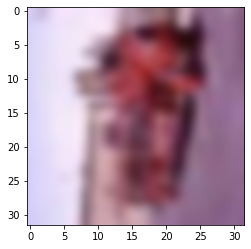

In [ ]:
plt.imshow(image.T, interpolation='bicubic')  # the input of imshow should be (M,N,3) but we have (3,N,M)

In [ ]:
train_loader = torch.utils.data.DataLoader(train, batch_size=100,shuffle=True)
test_loader = torch.utils.data.DataLoader(test, batch_size=100,shuffle=True)

**Neural Network Creation**

In [ ]:
class ANN(nn.Module):
  def __init__(self,input_size,hidden_size1,hidden_size2,num_classes):
    super(ANN,self).__init__()
    self.fc1 = nn.Linear(input_size,hidden_size1,bias = True)
    self.relu = nn.ReLU()
    self.fc2 = nn.Linear(hidden_size1,hidden_size2, bias=True)
    self.relu = nn.ReLU()
    self.output = nn.Linear(hidden_size2,num_classes, bias=True)
  
  def forward(self,x):
    data = x.view(x.size(0),-1)
    data = self.fc1(data)
    data = self.relu(data)
    data = self.fc2(data)
    data = self.relu(data)
    data = self.output(data)
    return data


In [ ]:
x = torch.randn(2,3,4)
out = x.view(x.size(0),-1)
print(x.shape)
print(out.shape)

torch.Size([2, 3, 4])
torch.Size([2, 12])


In [ ]:
input_size = 3*32*32
hidden_size1 = 120
hidden_size2 = 100
num_classes = 10
model = ANN(input_size,hidden_size1,hidden_size2,num_classes)

In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(),lr = 0.01)

**Training**

In [ ]:
loss_list = []
accuracy_list = []

for epoch in range(50):
    epoch_loss = 0
    for images,labels in train_loader:
      outputs = model(images)
      loss = criterion(outputs,labels)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    epoch_loss += loss.item()

  loss_list.append(epoch_loss/len(train_loader))

  with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in train_loader:
      outputs = model(images)
      _,predicted = torch.max(outputs.data,1)  #[-1.4,+0.01,...]
      total += labels.size(0)
      correct += (predicted == labels).sum().item()
      accuracy = correct/total
      accuracy_list.append(accuracy)

    print('Epoch [{}/50] Training Accuracy: {:.4f}'.format(epoch+1, correct/total),'Loss: {:.4f}'.format(loss_list[-1]))
    



Epoch [1/50] Training Accuracy: 0.2633 Loss: 2.1795
Epoch [2/50] Training Accuracy: 0.3002 Loss: 1.9811
Epoch [3/50] Training Accuracy: 0.3351 Loss: 1.8955
Epoch [4/50] Training Accuracy: 0.3540 Loss: 1.8446
Epoch [5/50] Training Accuracy: 0.3608 Loss: 1.8019
Epoch [6/50] Training Accuracy: 0.3786 Loss: 1.7650
Epoch [7/50] Training Accuracy: 0.3897 Loss: 1.7332
Epoch [8/50] Training Accuracy: 0.4050 Loss: 1.7052
Epoch [9/50] Training Accuracy: 0.4128 Loss: 1.6774
Epoch [10/50] Training Accuracy: 0.4070 Loss: 1.6510
Epoch [11/50] Training Accuracy: 0.4259 Loss: 1.6288
Epoch [12/50] Training Accuracy: 0.4415 Loss: 1.6053
Epoch [13/50] Training Accuracy: 0.4485 Loss: 1.5866
Epoch [14/50] Training Accuracy: 0.4485 Loss: 1.5688
Epoch [15/50] Training Accuracy: 0.4556 Loss: 1.5520
Epoch [16/50] Training Accuracy: 0.4686 Loss: 1.5361
Epoch [17/50] Training Accuracy: 0.4715 Loss: 1.5219
Epoch [18/50] Training Accuracy: 0.4715 Loss: 1.5099
Epoch [19/50] Training Accuracy: 0.4823 Loss: 1.4947
Ep

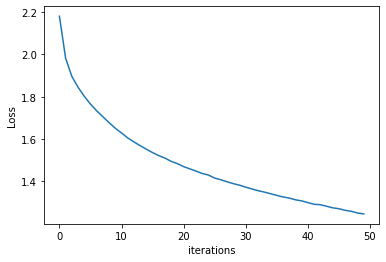

In [ ]:
x = range(50)
plt.plot(x,loss_list)
plt.xlabel('iterations')
plt.ylabel('Loss')
plt.show()

In [ ]:
#_,predicted = torch.max(outputs.data,1)
# outputs.data

tensor([[-1.6315e+00, -4.3580e+00, -1.0610e+00,  3.6782e+00, -7.3908e-01,
          4.5962e+00,  3.0079e-01, -2.1142e+00,  1.7964e+00, -2.0565e+00],
        [ 2.7260e+00, -4.6115e+00,  2.7451e-01,  2.5678e+00, -5.9064e-02,
          1.2919e+00,  2.0308e+00, -1.6922e+00, -1.3620e+00, -1.6460e+00],
        [ 1.1247e+00, -1.1789e+00,  1.7190e-01,  1.5222e+00,  4.0947e-01,
          1.1170e+00,  5.2054e-01, -2.4717e+00,  8.7365e-01, -2.1196e+00],
        [ 4.1680e+00,  1.1458e+01, -3.3714e+00, -3.1998e+00, -4.5285e+00,
         -3.2964e+00, -7.4680e+00, -2.8064e+00,  4.1840e+00,  5.9725e+00],
        [ 6.1712e+00,  8.9173e-01, -5.7652e-01,  8.0736e-02, -6.5294e-01,
         -1.9574e+00, -6.6416e-01, -3.8865e+00,  7.3414e-01,  2.1321e-01],
        [ 1.5283e+00, -1.7710e+00,  1.3532e+00,  4.8096e-01,  4.2218e-01,
         -4.7313e-01,  9.5497e-01, -1.7854e+00, -5.7024e-02, -9.6792e-01],
        [ 3.1961e+00,  1.2356e+00, -6.3998e-01, -1.3859e+00,  2.1138e-01,
         -2.5117e+00, -2.5952e+0

**Testing**

In [ ]:
with torch.no_grad():
  correct = 0
  total = 0
  for images, labels in test_loader:
    outputs = model(images)
    _,predicted = torch.max(outputs.data,1)
    total += labels.size(0)
    correct += (predicted == labels).sum().item()
  print('Test Accuracy: {:.4f}'.format(correct/total))

Test Accuracy: 0.5203


**Confusion Matrix**

In [ ]:
from sklearn.metrics import confusion_matrix

model.eval()
with torch.no_grad():
  correct = 0
  total = 0
  confusion_matrix = torch.zeros(10,10)
  for images, labels in test_loader:
    outputs = model(images)
    _,predicted = torch.max(outputs.data,1)
    total += labels.size(0)
    correct += (predicted == labels).sum().item()
    for i,j in zip(predicted,labels):
      confusion_matrix[i][j] += 1
confusion_matrix = confusion_matrix.numpy().astype(int)
print('Confusion Matrix')
print(confusion_matrix)